# Supermarket Sales Project

In [1]:
#First, we will install the packages necessary for the project
pip install pandas numpy matplotlib seaborn jupyter

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import the pandas library to work with dataframes
import pandas as pd

# Load the dataset
file_path = r'C:\Users\Nikhil\Desktop\Nikhil\DevOps\Python\Supermarket_Sales\supermarket_sales.csv'
data = pd.read_csv(file_path)

# Show the first 5 rows
print(data.head())


    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

In [4]:
# We see the shape of the dataframe
data.shape

(1000, 17)

In [5]:
# We do the same to statistical data of the dataframe
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [6]:
# Verify null values
print(data.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [7]:
# Eliminate duplicate data
data = data.drop_duplicates()


In [10]:
# Convertir date column into a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Create new columns
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = pd.to_datetime(data['Time']).dt.hour

print(data[['Date', 'Year', 'Month', 'Day', 'Hour']].head())


        Date  Year  Month  Day  Hour
0 2019-01-05  2019      1    5    13
1 2019-03-08  2019      3    8    10
2 2019-03-03  2019      3    3    13
3 2019-01-27  2019      1   27    20
4 2019-02-08  2019      2    8    10


In [15]:
# Create a new column to categorize income
data['Income_Level'] = pd.cut(data['Total'], bins=[0, 50, 150, 500], labels=['Low', 'Medium', 'High'])

print(data[['Total', 'Income_Level']].head())


      Total Income_Level
0  548.9715          NaN
1   80.2200       Medium
2  340.5255         High
3  489.0480         High
4  634.3785          NaN


In [17]:
# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


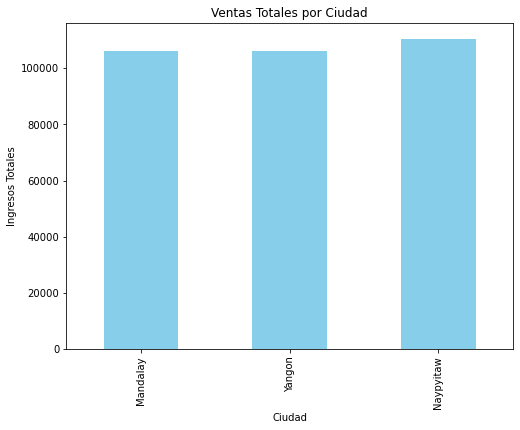

In [18]:
# Total sales in each city
city_sales = data.groupby('City')['Total'].sum().sort_values()

# Bar chart
plt.figure(figsize=(8, 6))
city_sales.plot(kind='bar', color='skyblue')
plt.title('Ventas Totales por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Ingresos Totales')
plt.show()

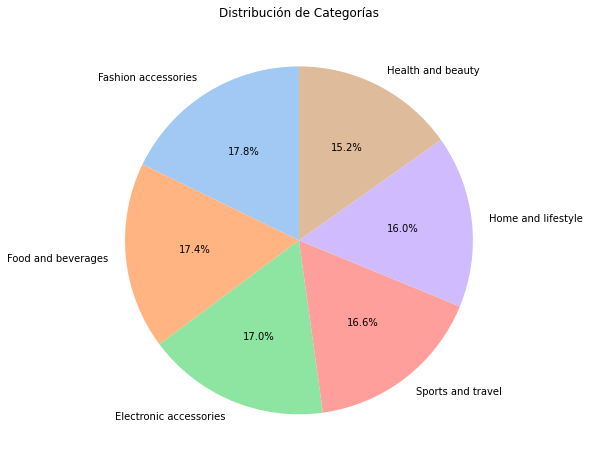

In [19]:
# Products most sold
categories = data['Product line'].value_counts()

# Pie chart
plt.figure(figsize=(8, 8))
categories.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribución de Categorías')
plt.ylabel('')
plt.show()


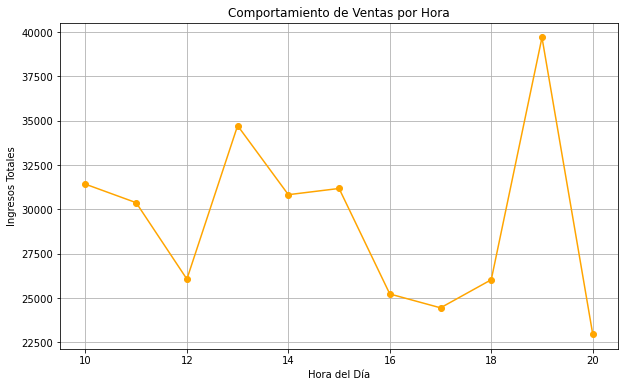

In [20]:
# Sales per hour
hourly_sales = data.groupby('Hour')['Total'].sum()

# Line chart
plt.figure(figsize=(10, 6))
hourly_sales.plot(kind='line', marker='o', color='orange')
plt.title('Comportamiento de Ventas por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Ingresos Totales')
plt.grid()
plt.show()


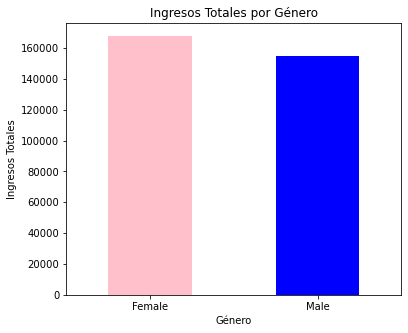

In [21]:
# Income per gender
gender_sales = data.groupby('Gender')['Total'].sum()

# Bar chart
plt.figure(figsize=(6, 5))
gender_sales.plot(kind='bar', color=['pink', 'blue'])
plt.title('Ingresos Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ingresos Totales')
plt.xticks(rotation=0)
plt.show()


In [22]:
# Export transformed data
data.to_csv('transformed_supermarket_sales.csv', index=False)